In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import ensembles

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse

In [37]:
data = pd.read_csv("train_data.csv", index_col="index")
data.pop("id")
target = pd.read_csv("train_target.csv", index_col="index")

In [38]:
data.columns[data.dtypes != object]

Index(['bedrooms_number', 'batchrooms_number', 'square_footage_home',
       'square_footage_lot', 'floors_number', 'has_waterfront',
       'has_been_viewed', 'condition_quality', 'housing_unity_grade',
       'square_footage_except_basement', 'square_footage_only_basement',
       'build_year', 'renovation_year', 'coordinate_latitude',
       'coordinate_longitude', 'square_footage_home_old',
       'square_footage_lot_old'],
      dtype='object')

In [39]:
data["date"] = pd.to_datetime(data["date"])
data["year"] = data.date.dt.year
data["month"] = data.date.dt.month
data["day"] = data.date.dt.day
data.pop("date")
pass

In [40]:
data.isna().sum()

bedrooms_number                   0
batchrooms_number                 0
square_footage_home               0
square_footage_lot                0
floors_number                     0
has_waterfront                    0
has_been_viewed                   0
condition_quality                 0
housing_unity_grade               0
square_footage_except_basement    0
square_footage_only_basement      0
build_year                        0
renovation_year                   0
coordinate_latitude               0
coordinate_longitude              0
square_footage_home_old           0
square_footage_lot_old            0
year                              0
month                             0
day                               0
dtype: int64

In [41]:
X_train, X_test, y_train, y_test = train_test_split(data.to_numpy(), target.to_numpy().ravel(), test_size=0.3, random_state=42) 

In [6]:
import time
start = time.time()

model = ensembles.RandomForestMSE(n_estimators=500, max_depth=None, feature_subsample_size=0.5)
rmse = model.fit(X_train, y_train, X_test, y_test)
    
fig = plt.figure(figsize=(10, 6))
plt.title("График зависимости RMSE от числа деревьев.", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.xlabel("Число деревьев", fontsize=14)
plt.plot(np.arange(500), rmse, lw=2, c="green")
plt.grid()
plt.yticks(np.arange(135, 255, 10))
print(time.time() - start)
plt.savefig("n_tree_forest.pdf")

ValueError: could not convert string to float: '2014-11-07'

In [ ]:
import time
start = time.time()

model = ensembles.GradientBoostingMSE(n_estimators=500, max_depth=None, feature_subsample_size=0.5)
rmse = model.fit(X_train, y_train, X_test, y_test)
    
fig = plt.figure(figsize=(10, 6))
plt.title("График зависимости RMSE от числа деревьев.", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.xlabel("Число деревьев", fontsize=14)
plt.plot(np.arange(500), rmse, lw=2, c="green")
plt.grid()
plt.yticks(np.arange(100, 650, 50))
print(time.time() - start)
plt.savefig("n_tree_boosting.pdf")

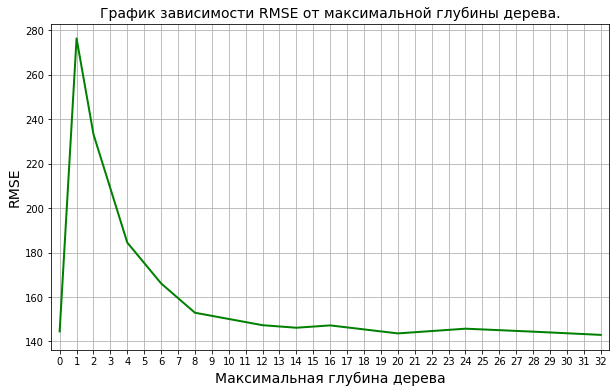

In [44]:
depth = [0, 1, 2, 4, 6, 8, 12, 14,  16, 20, 24, 28, 32]
rmse = []
for i in depth:
    md = i if i > 0 else None
    model = ensembles.RandomForestMSE(n_estimators=200, max_depth=md, feature_subsample_size=0.5)
    model.fit(X_train, y_train)
    res = model.predict(X_test)
    rmse.append(np.sqrt(mse(y_test, res)))

fig = plt.figure(figsize=(10, 6))
plt.title("График зависимости RMSE от максимальной глубины дерева.", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.xlabel("Максимальная глубина дерева", fontsize=14)
plt.xlim([-0.5, 32.5])
plt.xticks(list(range(0, 33)))

plt.plot(depth, rmse, lw=2, c="green")
plt.grid()
plt.savefig("depth_forest.pdf")

In [ ]:
fss = np.arange(0.1, 1.1, 0.1)
rmse = []
for i in fss:
    model = ensembles.RandomForestMSE(n_estimators=200, feature_subsample_size=i)
    model.fit(X_train, y_train)
    res = model.predict(X_test)
    rmse.append(np.sqrt(mse(y_test, res)))
    
fig = plt.figure(figsize=(10, 6))
plt.title("График зависимости RMSE от размера подвыборки признаков /n для одного дерева.", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.xlabel("Размерность подвыборки признаков", fontsize=14)
plt.plot(fss, rmse, lw=2, c="green")
plt.xticks(np.arange(0.1, 1.1, 0.1))
plt.grid()
plt.savefig("fss_forest.pdf")

[795.97875115 370.89704598 931.08395875 ... 309.41984251 281.4132161
 269.97771449]
[651.46267891 428.66492455 967.02455882 ... 369.23057876 401.93823037
 268.26173806]
[774.3223066  371.27118861 953.03907645 ... 336.92660851 324.7583301
 229.05528775]
[ 789.43687474  411.17325288 1001.70897689 ...  309.30663782  330.38245033
  241.29711345]
[828.5252255  395.09449488 925.68906531 ... 333.16436221 340.07743279
 233.65522696]
[834.12694556 382.90341019 950.12368543 ... 315.40359397 310.66919047
 239.93600632]
[886.26086436 379.97412273 911.44095915 ... 305.79805533 307.48299624
 252.2675428 ]
[860.38670209 364.7815798  973.1945808  ... 319.91801885 298.21476984
 257.34022267]
[785.87701128 372.9270127  911.42841138 ... 323.40488657 319.36789322
 242.14255498]
[822.18784316 371.95488526 933.53092773 ... 319.91808699 269.81599669
 268.71288739]
[920.84337533 392.31427682 990.87249282 ... 312.12613121 290.02710196
 269.40769897]
[841.57766647 403.98286134 887.33171914 ... 298.24399825 280.

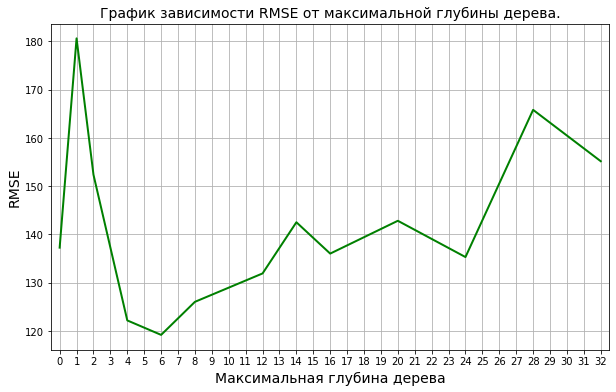

In [45]:
depth = [0, 1, 2, 4, 6, 8, 12, 14,  16, 20, 24, 28, 32]

rmse = []
for i in depth:
    md = i if i > 0 else None
    model = ensembles.GradientBoostingMSE(n_estimators=100, max_depth=md, feature_subsample_size=0.5)
    model.fit(X_train, y_train)
    res = model.predict(X_test)
    print(res)
    rmse.append(np.sqrt(mse(y_test, res)))

fig = plt.figure(figsize=(10, 6))
plt.title("График зависимости RMSE от максимальной глубины дерева.", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.xlabel("Максимальная глубина дерева", fontsize=14)
plt.xlim([-0.5, 32.5])
plt.xticks(list(range(0, 33)))
plt.plot(depth, rmse, lw=2, c="green")
plt.grid()
plt.savefig("depth_boosting.pdf")

In [ ]:
fss = np.arange(0.1, 1.1, 0.1)
rmse = []
for i in fss:
    model = ensembles.GradientBoostingMSE(n_estimators=100, feature_subsample_size=i)
    model.fit(X_train, y_train)
    res = model.predict(X_test)
    rmse.append(np.sqrt(mse(y_test, res)))
    
fig = plt.figure(figsize=(10, 6))
plt.title("График зависимости RMSE от размера подвыборки признаков /n для одного дерева.", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.xlabel("Размерность подвыборки признаков", fontsize=14)
plt.plot(fss, rmse, lw=2, c="green")
plt.xticks(np.arange(0.1, 1.1, 0.1))
plt.grid()
plt.savefig("fss_boosting.pdf")

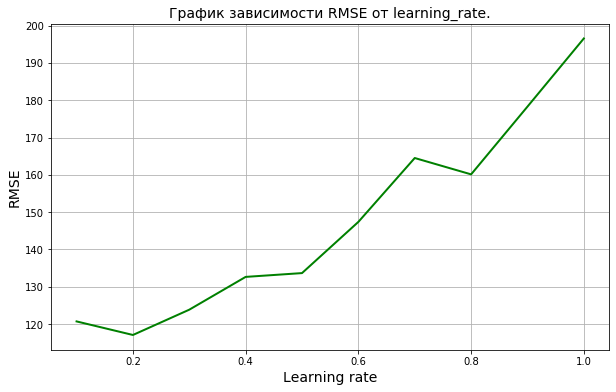

In [35]:
lr = np.arange(0.1, 1.1, 0.1)
rmse = []
for i in lr:
    model = ensembles.GradientBoostingMSE(n_estimators=100, feature_subsample_size=0.5, learning_rate=i)
    model.fit(X_train, y_train)
    res = model.predict(X_test)
    rmse.append(np.sqrt(mse(y_test, res)))
    
fig = plt.figure(figsize=(10, 6))
plt.title("График зависимости RMSE от learning_rate.", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.xlabel("Learning rate", fontsize=14)
plt.plot(lr, rmse, lw=2, c="green")
#plt.xticks(np.arange(0.1, 1.1, 0.1))
plt.grid()
plt.savefig("lr_boosting.pdf")